In [1]:
import os
import cv2
import functools
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from matplotlib import gridspec
from fst_func import load_image, resize_image_to_square, crop_center, show_n

C:\Users\Saad\anaconda3\envs\zx\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Saad\anaconda3\envs\zx\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Saad\anaconda3\envs\zx\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
print('TF Version: ', tf.__version__)
print('TF-Hub Version: ', hub.__version__)
print('Eager Mode Enabled: ', tf.executing_eagerly())
print('Available GPU: ', tf.test.is_gpu_available())

TF Version:  2.3.0
TF-Hub Version:  0.12.0
Eager Mode Enabled:  True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Available GPU:  False


In [3]:
hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

In [4]:
content_urls = dict(
    sea_turtle   = 'https://upload.wikimedia.org/wikipedia/commons/d/d7/Green_Sea_Turtle_grazing_seagrass.jpg',
    tuebingen    = 'https://upload.wikimedia.org/wikipedia/commons/0/00/Tuebingen_Neckarfront.jpg',
    grace_hopper = 'https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg',
  )

style_urls = dict(
    kanagawa_great_wave         = 'https://upload.wikimedia.org/wikipedia/commons/0/0a/The_Great_Wave_off_Kanagawa.jpg',
    kandinsky_composition_7     = 'https://upload.wikimedia.org/wikipedia/commons/b/b4/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg',
    hubble_pillars_of_creation  = 'https://upload.wikimedia.org/wikipedia/commons/6/68/Pillars_of_creation_2014_HST_WFC3-UVIS_full-res_denoised.jpg',
    van_gogh_starry_night       = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg',
    turner_nantes               = 'https://upload.wikimedia.org/wikipedia/commons/b/b7/JMW_Turner_-_Nantes_from_the_Ile_Feydeau.jpg',
    munch_scream                = 'https://upload.wikimedia.org/wikipedia/commons/c/c5/Edvard_Munch%2C_1893%2C_The_Scream%2C_oil%2C_tempera_and_pastel_on_cardboard%2C_91_x_73_cm%2C_National_Gallery_of_Norway.jpg',
    picasso_demoiselles_avignon = 'https://upload.wikimedia.org/wikipedia/en/4/4c/Les_Demoiselles_d%27Avignon.jpg',
    picasso_violin              = 'https://upload.wikimedia.org/wikipedia/en/3/3c/Pablo_Picasso%2C_1911-12%2C_Violon_%28Violin%29%2C_oil_on_canvas%2C_Kr%C3%B6ller-M%C3%BCller_Museum%2C_Otterlo%2C_Netherlands.jpg',
    picasso_bottle_of_rum       = 'https://upload.wikimedia.org/wikipedia/en/7/7f/Pablo_Picasso%2C_1911%2C_Still_Life_with_a_Bottle_of_Rum%2C_oil_on_canvas%2C_61.3_x_50.5_cm%2C_Metropolitan_Museum_of_Art%2C_New_York.jpg',
    fire                        = 'https://upload.wikimedia.org/wikipedia/commons/3/36/Large_bonfire.jpg',
    derkovits_woman_head        = 'https://upload.wikimedia.org/wikipedia/commons/0/0d/Derkovits_Gyula_Woman_head_1922.jpg',
    amadeo_style_life           = 'https://upload.wikimedia.org/wikipedia/commons/8/8e/Untitled_%28Still_life%29_%281913%29_-_Amadeo_Souza-Cardoso_%281887-1918%29_%2817385824283%29.jpg',
    derkovtis_talig             = 'https://upload.wikimedia.org/wikipedia/commons/3/37/Derkovits_Gyula_Talig%C3%A1s_1920.jpg',
    amadeo_cardoso              = 'https://upload.wikimedia.org/wikipedia/commons/7/7d/Amadeo_de_Souza-Cardoso%2C_1915_-_Landscape_with_black_figure.jpg'
) 

content_image_size = 384
style_image_size   = 256
content_images     = {k: load_image(v, (content_image_size, content_image_size)) for k, v in content_urls.items()}
style_images       = {k: load_image(v, (style_image_size, style_image_size)) for k, v in style_urls.items()}
style_images       = {k: tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME') for k, style_image in style_images.items()}

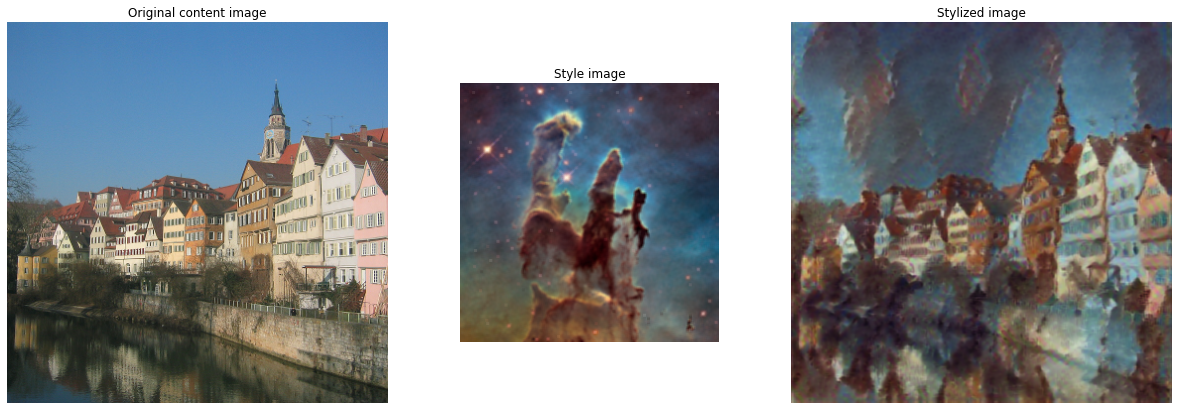

In [5]:
content_name = 'tuebingen'  
style_name = 'hubble_pillars_of_creation'  

stylized_image = hub_module(tf.constant(content_images[content_name]),
                            tf.constant(style_images[style_name]))[0]

show_n([content_images[content_name], style_images[style_name], stylized_image],
       titles=['Original content image', 'Style image', 'Stylized image'])

In [6]:
frame_size = 256
style_name = "fire"
cap        = cv2.VideoCapture(0)

while True:

    flag, frame = cap.read()
    if flag:

        image_rgb_np     = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        resized_image_np = resize_image_to_square(image_rgb_np, image_size=(frame_size, frame_size))

        outputs          = hub_module(tf.constant(resized_image_np), tf.constant(style_images[style_name]))
        stylized_image   = outputs[0]
        image_pil        = tf.keras.preprocessing.image. array_to_img(stylized_image[0])

        image_bgr_np     = cv2.cvtColor(np.array(image_pil), cv2.COLOR_BGR2RGB)

        cv2.imshow('style transfer', image_bgr_np)
    else:
        print('Error')
        break
    
    if cv2.waitKey(15) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()